# An Evaluation of Australia vs. New Zealand

To those people who have not spent time in the Oceanic region of the world, the two countries of Australia and New Zealand often get confused or lumped together due to perceived geographic, cultural, and linguistic similarities.  While this perception may exist, Australia and New Zealand are in fact two very distinct countries.  These types of misperceptions fuel the fire of a playful competitiveness between the two countries, sometimes affectionately referred to as the Trans-Tasman rivalry. 



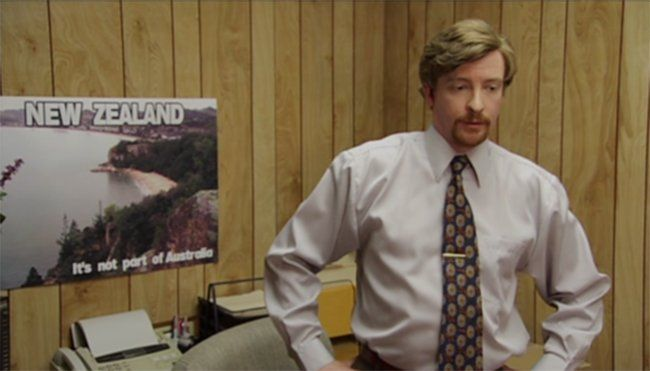

Given the existence of this tounge-in-cheek rivalry, this project will attempt to quantitatively compare the two countries to possibly determine which country  does come out on top as the best.  Ultimately, this project has no true baring on whether one of the two countries is truly superior to the other (I do not want to offend any Aussies or Kiwis!); I simply aim to explore and compare the two countries based on some of the commonly accepted quantitative indicators of quality of life.  Measures that try to capture quality of life, like the Human Development Index, tend to incorporate indicators from topics of economomy, education, and health.  Specifically, the indicators evaluated in this project are gross domestic product (GDP) per capita, unemployment rate, and infant mortality rate.  This project will identify historical trends while also exploring how these indicators influence each other within the context of the two Oceanic countries.  **In addition, the United States is included in the comparrison in order to contextualize each indicator for the type of audience that is unfamiliar with Australia and New Zealand (the same type of audience most prone to confusing the two countries).** The data used spans a 7 year timeframe between 2012 and 2018.  All data and charts in this project were acquired from the [World Development Explorer ](http://www.worlddev.xyz/about).

## **The Indicators**

### 1. *GDP per Capita*:
> The economic indicator chosen is GDP.  Gross national product (GNI) was alternatively considered, as GNI can be considered a more well rounded economic indicator (unlike GDP, which only indcludes the value of what a country produces, GNI also includes the income earned by residents both domestic and abroad).  However, when comparing the two indicators between Australia, New Zealand, and the United States, it is clear there is considerablly more foreign income being earned on a per capita basis comparedd to the two Oceanic countries:


##### **Loading and Prepping the Data for the Charts**

In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.templates.default = "plotly_dark"

In [2]:
#Create a dataframe from CSV with infant mortality rate, unemployment, and GDP per capita
GDP = pd.read_csv("https://raw.githubusercontent.com/mhgrody/DATA-690-WANG/main/world_development_explorer/wdi_data%20_withGDP.csv") 

#Create a dataframe from CSV with infant mortality rate, unemployment, and GNI per capita
GNI = pd.read_csv("https://raw.githubusercontent.com/mhgrody/DATA-690-WANG/main/world_development_explorer/wdi_data_withGNI.csv") 

#View the GDP dataframe
GDP.head()

,Unnamed: 0,Year,SP.DYN.IMRT.IN,NY.GDP.PCAP.PP.CD,SL.UEM.TOTL.ZS,Country Code,Country Name,Region,Income Group,Lending Type
0,0,2012,3.6,42826.789580,5.22,AUS,Australia,East Asia & Pacific,High income,Not classified
1,1,2013,3.5,45902.047948,5.66,AUS,Australia,East Asia & Pacific,High income,Not classified
2,2,2014,3.3,46880.220657,6.08,AUS,Australia,East Asia & Pacific,High income,Not classified
3,3,2015,3.3,46288.334479,6.05,AUS,Australia,East Asia & Pacific,High income,Not classified
4,4,2016,3.2,47339.969213,5.71,AUS,Australia,East Asia & Pacific,High income,Not classified


In [3]:
#GNI dataframe is identical to GDP, except for the column "NY.GNP.PCAP.CD" instead of "NY.GDP.PCAP.PP.CD"
GNI.head()

,Unnamed: 0,Year,NY.GNP.PCAP.CD,SP.DYN.IMRT.IN,SL.UEM.TOTL.ZS,Country Code,Country Name,Region,Income Group,Lending Type
0,0,2012,60210,3.6,5.22,AUS,Australia,East Asia & Pacific,High income,Not classified
1,1,2013,66020,3.5,5.66,AUS,Australia,East Asia & Pacific,High income,Not classified
2,2,2014,65150,3.3,6.08,AUS,Australia,East Asia & Pacific,High income,Not classified
3,3,2015,60500,3.3,6.05,AUS,Australia,East Asia & Pacific,High income,Not classified
4,4,2016,54140,3.2,5.71,AUS,Australia,East Asia & Pacific,High income,Not classified


In [13]:
#Merge GDP and GNI (without duplicate columns) so that all information is in the same dataframe. Also removed unnecesary "Unnamed: 0" column
df = pd.merge(GDP, GNI[['NY.GNP.PCAP.CD', 'Year', 'Country Name']],  how='left', left_on=['Year','Country Name'], right_on = ['Year','Country Name']).drop(['Unnamed: 0'], axis = 1)

#View the merged dataframe
df.head()

,Year,SP.DYN.IMRT.IN,NY.GDP.PCAP.PP.CD,SL.UEM.TOTL.ZS,Country Code,Country Name,Region,Income Group,Lending Type,NY.GNP.PCAP.CD
0,2012,3.6,42826.789580,5.22,AUS,Australia,East Asia & Pacific,High income,Not classified,60210
1,2013,3.5,45902.047948,5.66,AUS,Australia,East Asia & Pacific,High income,Not classified,66020
2,2014,3.3,46880.220657,6.08,AUS,Australia,East Asia & Pacific,High income,Not classified,65150
3,2015,3.3,46288.334479,6.05,AUS,Australia,East Asia & Pacific,High income,Not classified,60500
4,2016,3.2,47339.969213,5.71,AUS,Australia,East Asia & Pacific,High income,Not classified,54140


In [25]:
#Get info of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               21 non-null     int64  
 1   SP.DYN.IMRT.IN     21 non-null     float64
 2   NY.GDP.PCAP.PP.CD  21 non-null     float64
 3   SL.UEM.TOTL.ZS     21 non-null     float64
 4   Country Code       21 non-null     object 
 5   Country Name       21 non-null     object 
 6   Region             21 non-null     object 
 7   Income Group       21 non-null     object 
 8   Lending Type       21 non-null     object 
 9   NY.GNP.PCAP.CD     21 non-null     int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 1.8+ KB


In [22]:
#Create bar chart comparing countries' GDP for 2018
fig = px.bar(df.query("Year==2018"), 
             x="Country Name", y="NY.GDP.PCAP.PP.CD", 
             hover_name="Country Name", 
             color="Country Name",
             height=800,
             labels={
                     "Country Name": "Country Name",
                     "sepal_width": "Sepal Width (cm)",
                     "NY.GDP.PCAP.PP.CD": "GDP Per Capita"
                 },
             title="GDP per Capita for Australia, New Zealand, and US in 2018"

             )
fig.show()

In [23]:
#Create bar chart comparing countries' GDP for 2018
fig = px.bar(df.query("Year==2018"), 
             x="Country Name", y="NY.GNP.PCAP.CD", 
             hover_name="Country Name", 
             color="Country Name",
             height=800,
             labels={
                     "Country Name": "Country Name",
                     "sepal_width": "Sepal Width (cm)",
                     "NY.GNP.PCAP.CD": "GNI Per Capita"
                 },
             title="GNI per Capita for Australia, New Zealand, and US in 2018"

             )
fig.show()

> In order to keep the comparrisons more consistent and on a similar scale, GDP was chosen

### 2. *Unemployment Rate (% of total labor force):*
> The education indicator chosen is unemployment rate.  This indicator was chosen simply because it was one of the few available indicators for education on the World Development Explorer that had data for the two Oceanic countries.



### 3. *Infant Mortality rate (deaths per 1,000 live births):*
> The health indicator chosen is infant mortality rate.  This indicator was chosen because it is considered an incredibly informative metric when evaluating the health of a country.  According to the [World Health Organization](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/3138), infant mortality rate "reflects the social, economic and environmental conditions in which children (and others in society) live, including their health care."

## **The Comparrison**

In [26]:
#Create line chart to show trends over time for GDP per capita
fig = px.line(df, 
             x="Year", y="NY.GDP.PCAP.PP.CD", 
             hover_name="Year", 
             color="Country Name",
             height=800,
             labels={
                     "Year": "Year",
                     "NY.GDP.PCAP.PP.CD": "GDP per Capita"
                 },
             title="GDP per Capita for Australia, New Zealand, and the United States: 2012-2018"
             )
fig.show()

*   **GDP per capita:** GDP has steadily increased for all three countries between 2012 and 2018.  All 3 countries' GDP has also increased at relatively the same rate as well.  This could partially be a result of inflation.  This checks out as the Australian dollar to US dollar conversion rate dropped roughly 31% between 2012 and 2018.  This would mean the Australian economoy weakened with respect to the US economy.  The conversion rate between the New Zealand dollar and US dollar similarly decreased (14.98%). Conversion rates: [AU](https://www.google.com/search?q=australia+usd+conversion&rlz=1C5CHFA_enUS779US780&oq=australia+usd&aqs=chrome.2.69i57j0l7j0i20i263j0.7052j0j7&sourceid=chrome&ie=UTF-8) [NZ](https://www.google.com/search?q=new+zealand+currency+to+usd&rlz=1C5CHFA_enUS779US780&sxsrf=ALeKk018ItCfQObXuj_d1IgiUW_9nVTWlw%3A1616979040828&ei=YCRhYJz5MZqg5NoPsLWLuA0&oq=new+zealand+currency&gs_lcp=Cgdnd3Mtd2l6EAEYADIHCAAQsAMQQzIHCAAQsAMQQzIHCAAQsAMQQzIHCAAQsAMQQzIHCAAQsAMQQzIHCAAQsAMQQzIHCAAQsAMQQzIHCAAQsAMQQzIHCAAQsAMQQzIHCAAQsAMQQ1AAWABgitkCaAJwAngAgAG3BYgBtwWSAQM1LTGYAQCqAQdnd3Mtd2l6yAEKwAEB&sclient=gws-wiz)

In [27]:
#Create line chart to show trends over time for infant mortality rate
fig = px.line(df, 
             x="Year", y="SP.DYN.IMRT.IN", 
             hover_name="Year", 
             color="Country Name",
             height=800,
             labels={
                     "Year": "Year",
                     "SP.DYN.IMRT.IN": "Infant Mortality Rate (per 1,000 live births)"
                 },
             title="Infant Mortality Rate for Australia, New Zealand, and the United States: 2012-2018"
             )
fig.show()

*   **Unemployment:** Beginning in 2012, Australia had the lowest unemployment rate (5.3%).  However, in 2014 and 2015 both New Zealand and the US overtook Australia, with the US at the lowest rate (4% vs New Zealand's 4.4% and Australia's 5.4%).   Interestingly, while both the US and New Zealand conversion rate declined between 2012 and 2018, Australia's increased.  It steadily increased between 2012 and 2014, and then steadily deceased, settling a hair above where it was in 2012.

In [28]:
#Create line chart to show trends over time for unemployment
fig = px.line(df, 
             x="Year", y="SL.UEM.TOTL.ZS", 
             hover_name="Year", 
             color="Country Name",
             height=800,
             labels={
                     "Year": "Year",
                     "SL.UEM.TOTL.ZS": "Unemployment Rate (%)"
                 },
             title="Unemployment Rate for Australia, New Zealand, and the United States: 2012-2018"
             )
fig.show()

*   **Infant Mortality Rate:** Starting in 2012, Australia had the lowest infant mortality rate at 3.5.  New Zealand's was 1.6 higher, and the US infant mortality rate was almost twice as high as Australia's with a rate of 6 infant deaths per 1000 births.  Between 2012 and 2018, all three countrie's infant mortality rates have decreased at roughly the same rate (around 20%).  By 2018, Australia maintained the lowest infant mortality rate between the three countries.

### The Relationship Between GDP, Infant Mortality Rate, and Unemployment

> *This bubble charts show the relationship between GDP, Infant Mortality Rate, and Unemployment between 2012 and 2018*

In [29]:
#Create a bubble chart with GDP on x axis, infant mortality rate on y axis, and unemployment as bubble size.  Every year between 2012 and 2018 is treated as a seperate data point
fig = px.scatter(df, x="NY.GDP.PCAP.PP.CD", y="SP.DYN.IMRT.IN",
	         size="SL.UEM.TOTL.ZS", color="Country Name",
                 hover_name="Year", log_x=False, size_max=60, labels={
                     "Year": "Year",
                     "NY.GDP.PCAP.PP.CD": "GDP per Capita",
                     "SP.DYN.IMRT.IN": "Infant Mortality Rate (per 1,000 live births)",
                     "SL.UEM.TOTL.ZS": "Unemployment Rate (%)"
                 },
             title="GDP, Infant Mortality Rate, and Unemployment Rate for Australia, New Zealand, and the United States: 2012-2018")
fig.show()

#### Stray Observations:

*   Intuitively it might seem like the country with the highest GDP would have the lower infant mortality rates and unemployment rates.  If a country has a strong economy, it seems more likely that it will have the resources to improve health and combat unemployment.  However, these charts show that, at least for these three countries, this is not the case.  For example, despite consistently having a GDP of about $10,000 more than Australia and $20,000 more than New Zealand between 2012 and 2018, the United States maintained a much higher infant mortality rate than both countries for the same time period.  One possible explanation is that the US dedicated less of its economic resources to healthcare.  Both Australia and New Zealand have robust public healthcare systems, while the US does not.  Alternatively, looking at unempolyment rate, despite Australia having a GDP consistently about $10,00 higher than New Zealand, New Zealand was able to overcome Australia and signfificantly outpace it in unemployment rate by 2018 (relative to 2012).  An explanation for this could be any number of internal political, social, economic, or environmental factors unique to Australia and not New Zealand.

## **The Conclusion**

So which country is better?  Australia had better GDP and infant mortality rates compared to New Zealand, but New Zealand generally outperformed Australia in unemployment.  Ulitimately, while this analysis provides us some interesing insight into the similaries and differences between Australia and New Zealand (and the US), there is not enough information here to come to any definitive conclusions. There are many more factors, both quantitative and qualitative, that define a country for what it is.  Further research should investigate more indicators, while also providing more cultural, political, and societal qualitative context on the differences between these two countries.